## Predict Credit Amount

### Objective- 

The objective of the problem is to predict the values of credit_amount variable as per serial number variable. Please view the sample submissions file for better understanding. The solution must be presented in the form of a csv with predicted values of the response variable credit_amount along with it’s corresponding serial number.
Evaluation Metric : Normalized root mean squared error. The score is calculated by (1-rmse/normalization factor)*100.
Submission Limit: . Please note that individual submission limits 10


### 1. Dataset Preparation

### 1.1 Import

In [3]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Reading Data file

In [4]:
#Let's read the dataset first
train = pd.read_csv("/Users/rgaur/Downloads/Bank_Account/train.csv")
test = pd.read_csv("/Users/rgaur/Downloads/Bank_Account/test.csv")


In [5]:
# Save the 'serial number' column
train_sn = train['serial number']
test_sn = test['serial number']

# Now drop the 'serial number' column since it's unnecessary for the prediction process.
train.drop("serial number", axis = 1, inplace = True)
test.drop("serial number", axis = 1, inplace = True)

### 1.3 Data Inspection

In [6]:
train.shape


(700, 24)

In [7]:
test.shape

(300, 23)

In [8]:
train.head()

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [9]:
test.head()

,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,...,4,A123,29,A143,A151,1,A172,1,A191,A201
1,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,...,4,A124,46,A143,A153,2,A173,1,A192,A201
2,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,...,2,A124,47,A143,A153,1,A173,1,A192,A201
3,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,...,2,A122,41,A142,A152,2,A173,1,A191,A201
4,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,...,1,A122,32,A143,A152,1,A173,2,A192,A201


In [10]:
#Analyzing 'credit_amount' column
train['credit_amount'].describe()

count      700.000000
mean      3182.331429
std       2725.319217
min        276.000000
25%       1350.750000
50%       2253.000000
75%       3913.250000
max      15945.000000
Name: credit_amount, dtype: float64


 mu = 3182.33 and sigma = 2723.37



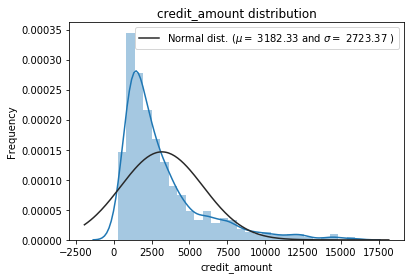

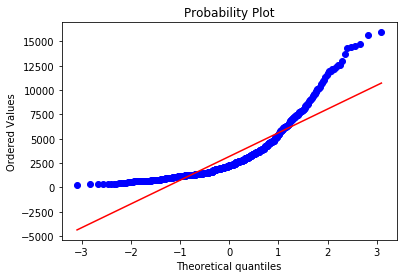

Skewness: 1.907337
Kurtosis: 3.952490


In [11]:
from scipy import stats
from scipy.stats import norm

# Plot Histogram
sns.distplot(train['credit_amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['credit_amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('credit_amount distribution')

fig = plt.figure()
res = stats.probplot(train['credit_amount'], plot=plt)
plt.show()

print("Skewness: %f" % train['credit_amount'].skew())
print("Kurtosis: %f" % train['credit_amount'].kurt())

### 2. Exploratory Data Anaylsis

### Checking Categorical Data

In [12]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

### Checking Numerical Data

In [13]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['duration_month', 'credit_amount', 'Saving Account', 'Salary',
       'investment', 'resident_since', 'age', 'credits_no', 'liables'],
      dtype='object')

In [14]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  15 categorical + 9 numerical = 24 features


### Correlation Matrix Heatmap

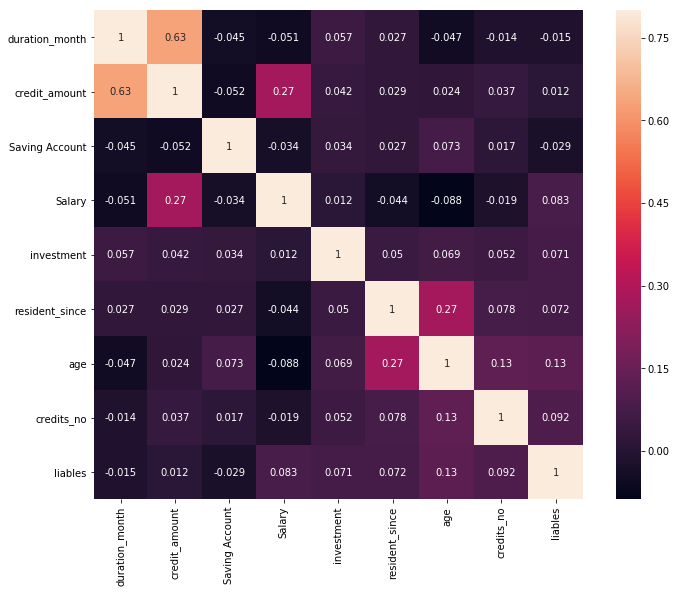

In [15]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot=True, square=True);

In [16]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

NameError: name 'cols' is not defined

In [ ]:
# duration_month vs credit_amount 
var = 'duration_month'
data = pd.concat([train['credit_amount'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="credit_amount", data=data)
fig.axis(ymin=0, ymax=800000);

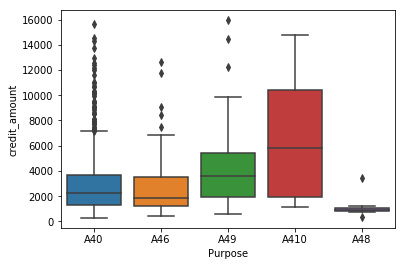

In [17]:
# Purpose vs credit_amount
sns.boxplot(x=train['Purpose'], y=train['credit_amount'])

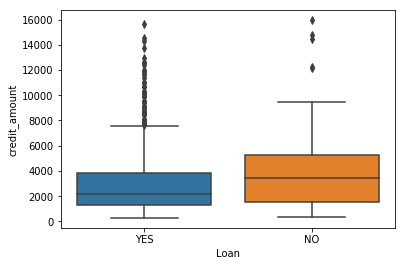

In [18]:
# Loan vs credit_amount
sns.boxplot(x=train['Loan'], y=train['credit_amount'])

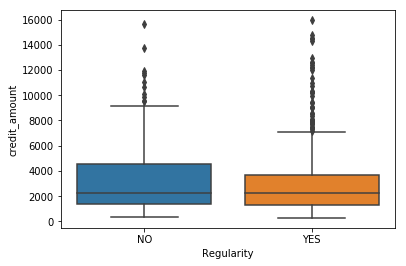

In [19]:
# Regularity vs credit_amount
sns.boxplot(x=train['Regularity'], y=train['credit_amount'])

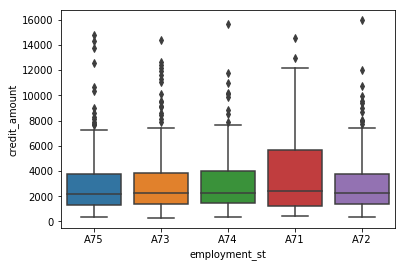

In [20]:
# employment_st vs credit_amount
sns.boxplot(x=train['employment_st'], y=train['credit_amount'])

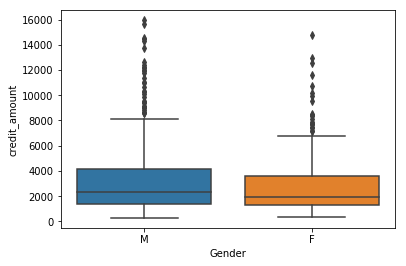

In [21]:
# Gender vs credit_amount
sns.boxplot(x=train['Gender'], y=train['credit_amount'])

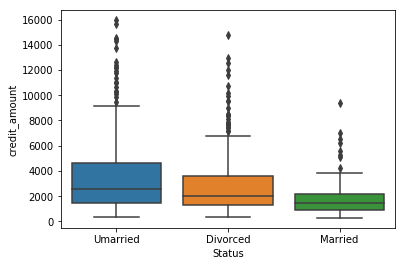

In [22]:
# Status vs credit_amount
sns.boxplot(x=train['Status'], y=train['credit_amount'])

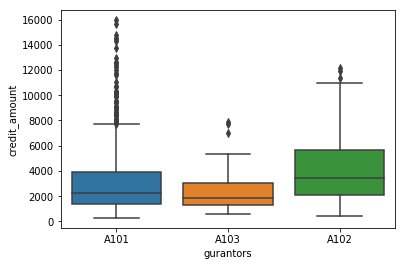

In [23]:
# gurantors vs credit_amount
sns.boxplot(x=train['gurantors'], y=train['credit_amount'])

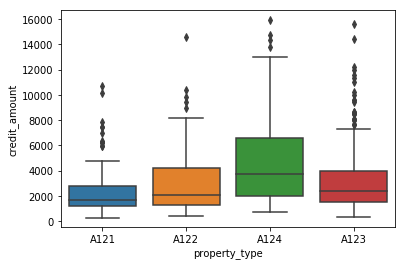

In [24]:
# property_type vs credit_amount
sns.boxplot(x=train['property_type'], y=train['credit_amount'])

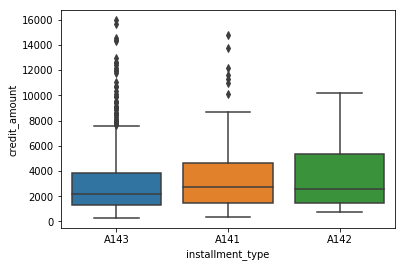

In [25]:
# installment_type vs credit_amount
sns.boxplot(x=train['installment_type'], y=train['credit_amount'])

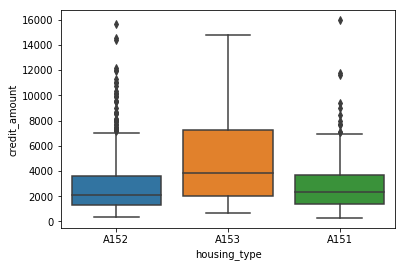

In [26]:
# housing_type vs credit_amount
sns.boxplot(x=train['housing_type'], y=train['credit_amount'])

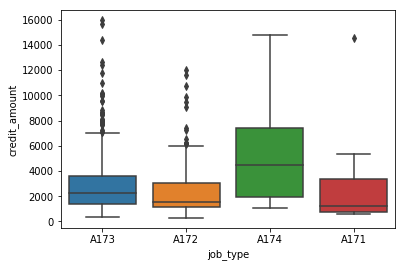

In [27]:
# job_type vs credit_amount
sns.boxplot(x=train['job_type'], y=train['credit_amount'])

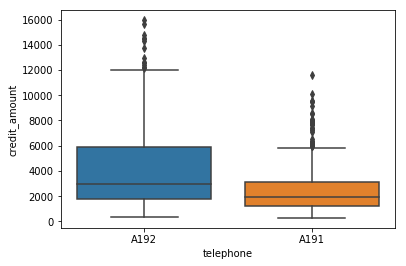

In [28]:
# telephone vs credit_amount
sns.boxplot(x=train['telephone'], y=train['credit_amount'])

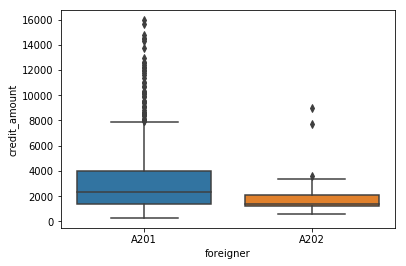

In [29]:
# foreigner vs credit_amount
sns.boxplot(x=train['foreigner'], y=train['credit_amount'])

### 3. Impute Missing Data and Clean Data

In [30]:
# Combining Datasets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.credit_amount.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['credit_amount'], axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [31]:
# Find Missing Ratio of Dataset
round(100*(all_data.isnull().sum()/len(all_data.index)), 2)

Gender               0.0
Loan                 0.0
Purpose              0.0
Regularity           0.0
Salary               0.0
Saving Account      18.3
Status               0.0
account_info        39.4
age                  0.0
credits_no           0.0
duration_month       0.0
employment_st        0.0
foreigner            0.0
gurantors            0.0
housing_type         0.0
installment_type     0.0
investment           0.0
job_type             0.0
liables              0.0
property_type        0.0
resident_since       0.0
savings_account      0.0
telephone            0.0
dtype: float64

In [32]:
#imputing NotAvailable in account_info column

all_data.account_info=pd.DataFrame(all_data.account_info).fillna("NotAvailable")

In [33]:
all_data.head()

,Gender,Loan,Purpose,Regularity,Salary,Saving Account,Status,account_info,age,credits_no,...,gurantors,housing_type,installment_type,investment,job_type,liables,property_type,resident_since,savings_account,telephone
0,M,YES,A40,NO,852,NaN,Umarried,BRONZE,67,2,...,A101,A152,A143,34.08,A173,1,A121,4,A65,A192
1,F,YES,A40,YES,2400,72.0,Divorced,SILVER,22,1,...,A101,A152,A143,48.00,A173,1,A121,2,A61,A191
2,M,YES,A46,NO,2078,68.0,Umarried,NotAvailable,49,1,...,A101,A152,A143,41.56,A172,2,A121,3,A61,A191
3,M,YES,A40,YES,2380,73.0,Umarried,BRONZE,45,1,...,A103,A153,A143,47.60,A173,2,A122,4,A61,A191
4,M,YES,A40,NO,1756,52.0,Umarried,BRONZE,53,2,...,A101,A153,A143,52.68,A173,2,A124,4,A61,A191


In [34]:
#imputing 0 in Saving Account column

all_data['Saving Account'] = all_data['Saving Account'].fillna(0)

In [35]:
all_data.dtypes

Gender               object
Loan                 object
Purpose              object
Regularity           object
Salary                int64
Saving Account      float64
Status               object
account_info         object
age                   int64
credits_no            int64
duration_month        int64
employment_st        object
foreigner            object
gurantors            object
housing_type         object
installment_type     object
investment          float64
job_type             object
liables               int64
property_type        object
resident_since        int64
savings_account      object
telephone            object
dtype: object

### 4. Feature Transformation

In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ('Gender', 'Loan', 'Purpose', 'Regularity', 'Status', 'account_info',
       'employment_st', 'foreigner', 'gurantors', 'housing_type',
       'installment_type', 'job_type', 'property_type', 'savings_account',
       'telephone')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Check shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1000, 23)


In [37]:
all_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

#### Fixing "skewed" features.


 mu = 7.77 and sigma = 0.77



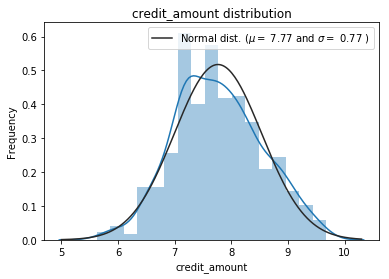

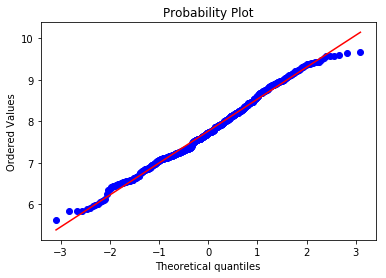

Skewness: 0.135134
Kurtosis: -0.342111


In [38]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["credit_amount"] = np.log1p(train["credit_amount"])

#Check the new distribution 
sns.distplot(train['credit_amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['credit_amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('credit_amount distribution')

fig = plt.figure()
res = stats.probplot(train['credit_amount'], plot=plt)
plt.show()

y_train = train.credit_amount.values

print("Skewness: %f" % train['credit_amount'].skew())
print("Kurtosis: %f" % train['credit_amount'].kurt())

### 5. Modeling and Predictions

In [39]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

In [40]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
foreigner,4.905655
Saving Account,4.173155
gurantors,3.259350
Purpose,2.160354
liables,1.906579


In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 23 skewed numerical features to Box Cox transform


In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1000, 23)


In [43]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [44]:
test.columns

Index(['Gender', 'Loan', 'Purpose', 'Regularity', 'Salary', 'Saving Account',
       'Status', 'account_info', 'age', 'credits_no', 'duration_month',
       'employment_st', 'foreigner', 'gurantors', 'housing_type',
       'installment_type', 'investment', 'job_type', 'liables',
       'property_type', 'resident_since', 'savings_account', 'telephone'],
      dtype='object')

In [45]:
train.columns

Index(['Gender', 'Loan', 'Purpose', 'Regularity', 'Salary', 'Saving Account',
       'Status', 'account_info', 'age', 'credits_no', 'duration_month',
       'employment_st', 'foreigner', 'gurantors', 'housing_type',
       'installment_type', 'investment', 'job_type', 'liables',
       'property_type', 'resident_since', 'savings_account', 'telephone'],
      dtype='object')

In [46]:
#conda install py-xgboost

In [47]:
#conda install -c conda-forge lightgbm 

In [48]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [49]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [50]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.4819 (0.0597)

ElasticNet score: 0.4820 (0.0598)

Kernel Ridge score: 0.4815 (0.0640)

Gradient Boosting score: 0.5072 (0.0454)

Xgboost score: 0.5030 (0.0429)

LGBM score: 0.4881 (0.0557)



In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [53]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.4709 (0.0598)



In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4714 (0.0596)


In [56]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
train.columns

Index(['Gender', 'Loan', 'Purpose', 'Regularity', 'Salary', 'Saving Account',
       'Status', 'account_info', 'age', 'credits_no', 'duration_month',
       'employment_st', 'foreigner', 'gurantors', 'housing_type',
       'installment_type', 'investment', 'job_type', 'liables',
       'property_type', 'resident_since', 'savings_account', 'telephone'],
      dtype='object')

In [58]:
test.head(5)

,Gender,Loan,Purpose,Regularity,Salary,Saving Account,Status,account_info,age,credits_no,...,gurantors,housing_type,installment_type,investment,job_type,liables,property_type,resident_since,savings_account,telephone
700,1.000000,1.730463,1.000000,1.730463,13.482863,11.357200,1.000000,2.194318,5.437269,1.730463,...,1.0,1.000000,2.194318,6.186387,1.730463,1.730463,2.194318,2.820334,2.194318,1.000000
701,1.730463,1.730463,1.000000,1.000000,12.449076,4.701973,2.194318,1.000000,6.210789,2.194318,...,1.0,2.194318,2.194318,5.562032,2.194318,1.730463,2.540963,2.820334,1.000000,1.730463
702,1.000000,1.730463,1.000000,1.730463,13.599768,10.647633,1.000000,1.730463,6.248357,1.730463,...,1.0,2.194318,2.194318,6.257275,2.194318,1.730463,2.540963,2.194318,1.730463,1.730463
703,1.730463,1.730463,2.820334,1.000000,12.682968,10.222126,2.194318,2.540963,6.012077,2.194318,...,1.0,1.730463,1.730463,5.702848,2.194318,1.730463,1.730463,2.194318,1.730463,1.000000
704,1.000000,1.730463,2.820334,1.730463,12.793857,4.530419,1.000000,2.540963,5.597157,1.730463,...,1.0,1.730463,2.194318,5.769708,2.194318,2.194318,1.730463,1.730463,1.000000,1.730463


### Stacked models

In [59]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.3425726959599476


### XGBoost

In [60]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.12200824722318016


### LightGBM

In [61]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.31366339798676696


In [62]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 ))

RMSLE score on train data:
0.30770121329885447


### Ensemble Prediction

In [63]:
# Example
Stacked = 1/(0.4714)
XGBoost = 1/(0.5030)
LGBM = 1/(0.4881)
Sum = Stacked + XGBoost + LGBM
Stacked = Stacked/Sum
XGBoost = XGBoost/Sum
LGBM = LGBM/Sum
print(Stacked, XGBoost, LGBM)

0.3444756700973416 0.32283465384470544 0.33268967605795297


In [64]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*Stacked +
               xgb_train_pred*XGBoost + lgb_train_pred*LGBM))

RMSLE score on train data:
0.2503784769208693


In [65]:
ensemble = stacked_pred*Stacked + xgb_pred*XGBoost + lgb_pred*LGBM

### Submission

In [66]:
sub = pd.DataFrame()
sub['S.no'] = test_sn
sub['credit_amount'] = ensemble.round()
sub.to_csv('credit1.csv',index=False)